# EDA and Cleaning

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [ ]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

**IMPORTING THE DATASET**

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


Sales Channel
---




In [ ]:
#count total of sales channel

df.sales_channel.count()

50000

In [ ]:
df.sales_channel.value_counts()

Internet    44382
Mobile       5618
Name: sales_channel, dtype: int64

In [ ]:
inet = df.sales_channel.value_counts().values[0]  / df.sales_channel.count() *100
inet

88.764

In [ ]:
mob = df.sales_channel.value_counts().values[1]  / df.sales_channel.count() *100
mob

11.236

In [ ]:
print (f"Percentage of users who book through Mobile Apps are {mob}%")
print (f"Percentage of users who book through Internet are {inet}%")

Percentage of users who book through Mobile Apps are 11.236%
Percentage of users who book through Internet are 88.764%


**Mostly people bookings using through website (88,8 %) and only 11,2 % people using mobile apps**





Trip Type
---






In [ ]:
df.trip_type.count()

50000

In [ ]:
df.trip_type.unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [ ]:
df.trip_type.value_counts()

RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64

In [ ]:
round = df.trip_type.value_counts().values[0]  / df.trip_type.count() *100
round

98.994

In [ ]:
oneway = df.trip_type.value_counts().values[1]  / df.trip_type.count() *100
oneway

0.774

In [ ]:
circle = df.trip_type.value_counts().values[2]  / df.trip_type.count() *100
circle

0.232

In [ ]:
print (f"Percentage of users who took Rountrip are {round}%")
print (f"Percentage of users who took Oneway are {oneway}%")
print (f"Percentage of users who took CircleTrip  are {circle}%")

Percentage of users who took Rountrip are 98.994%
Percentage of users who took Oneway are 0.774%
Percentage of users who took CircleTrip  are 0.232%


Purchase Lead
---










<Axes: xlabel='purchase_lead', ylabel='Count'>

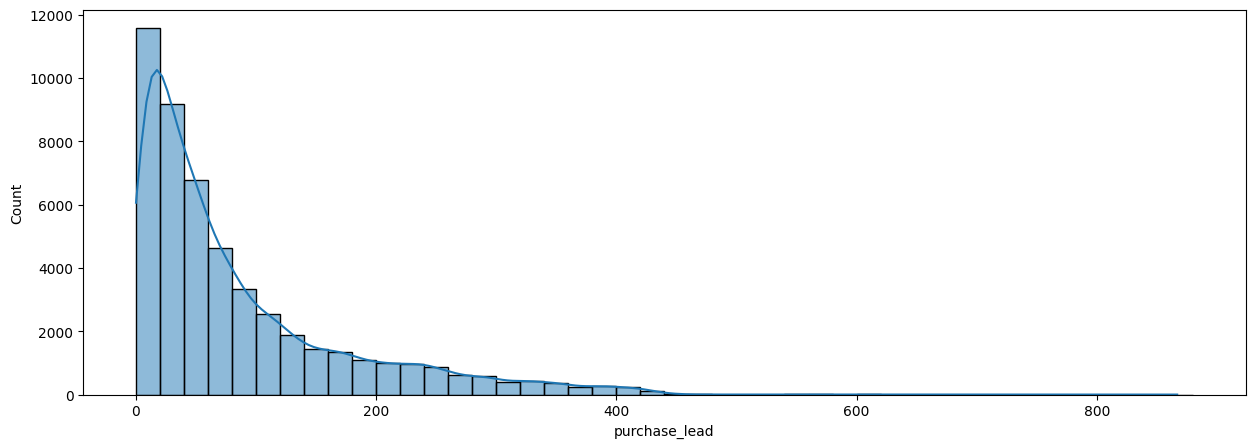

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x="purchase_lead", binwidth=20,kde=True)

In [ ]:
(df.purchase_lead > 365).value_counts()

False    49162
True       838
Name: purchase_lead, dtype: int64

British Airways generally allows customers to book flights up to 355 days in advance. This means that you can typically book a flight with British Airways almost a year. At this point i will consider that as a outliers. (> 365 days)

Filtering dataset from outliers

In [ ]:
df = df[df.purchase_lead < 365 ]
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


<Axes: xlabel='purchase_lead', ylabel='Count'>

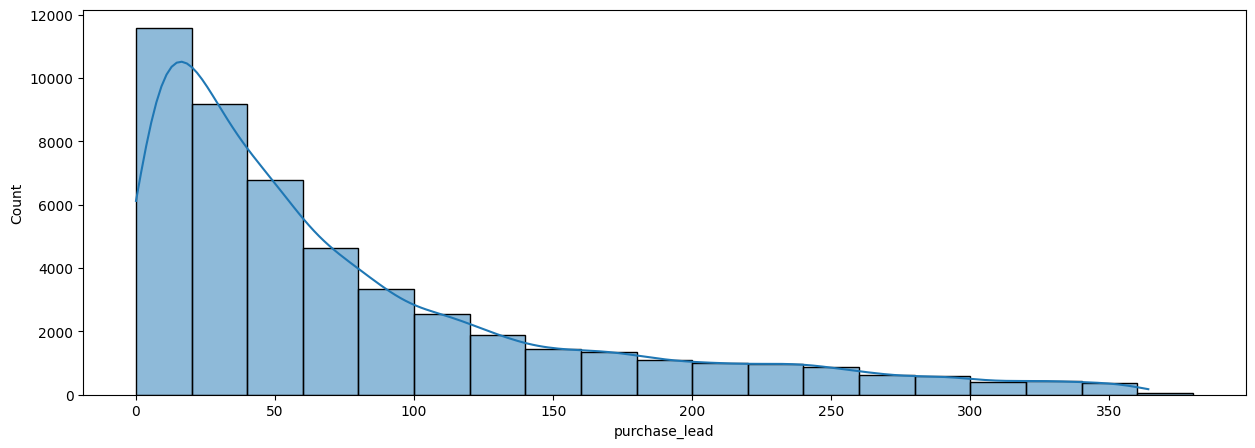

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x="purchase_lead", binwidth=20,kde=True)

Length of Stay
---



<Axes: xlabel='length_of_stay', ylabel='Count'>

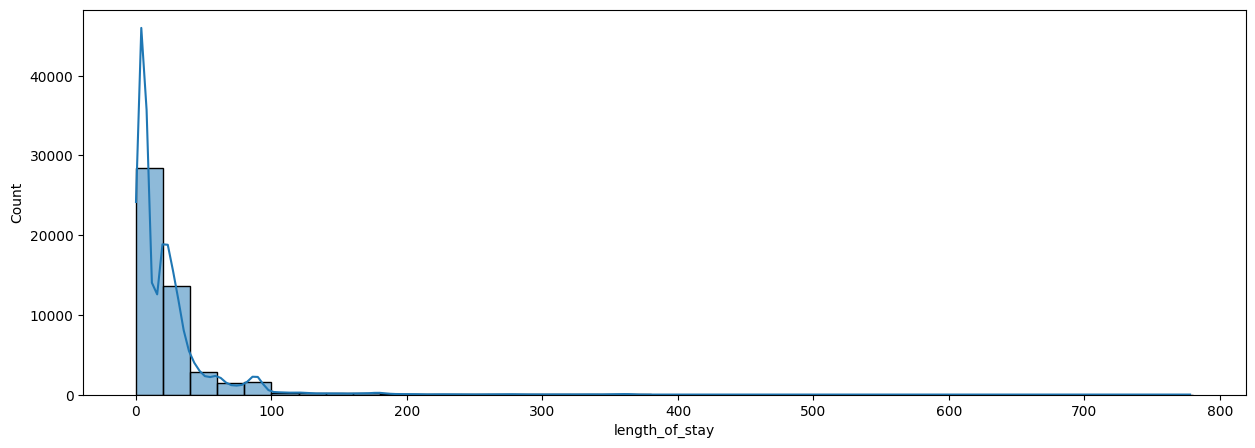

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x="length_of_stay", binwidth=20,kde=True)

In [ ]:
(df.length_of_stay > 500).value_counts()

False    49141
True         9
Name: length_of_stay, dtype: int64

There will be a reason for user who stays up to 500 days, but at this point i will consider user who stays up to 500 days are outliers

In [ ]:
df = df[df.length_of_stay < 500 ]
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


Flight Hour
---



<Axes: xlabel='flight_hour', ylabel='Count'>

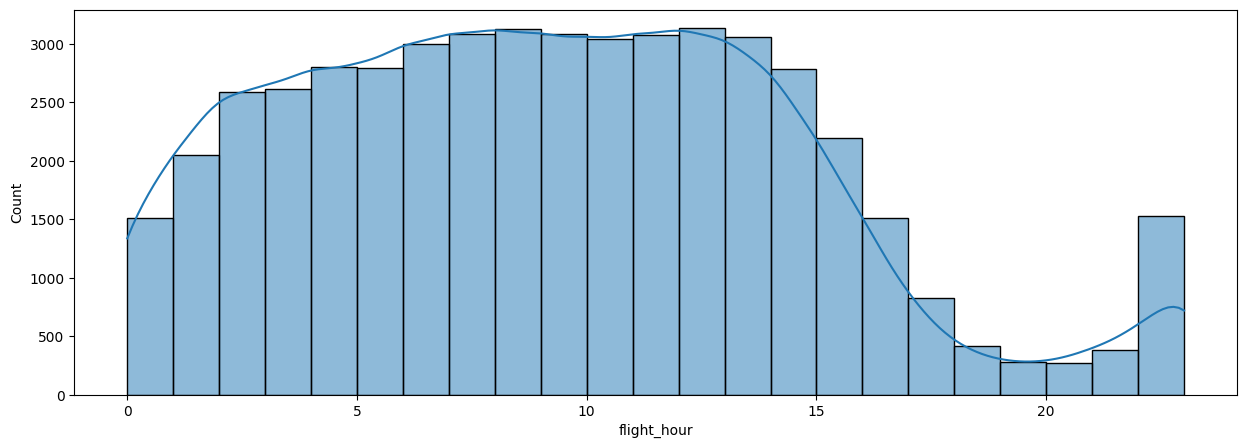

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x="flight_hour", binwidth=1,kde=True)

Flight Day
---



In [ ]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

<ipython-input-28-1539a09b7f5c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["flight_day"] = df["flight_day"].map(mapping)


In [ ]:
df.flight_day.value_counts()

1    7896
3    7598
2    7548
4    7358
5    6707
7    6317
6    5717
Name: flight_day, dtype: int64

**Most people fly on monday**

Booking Origin
---



Text(0, 0.5, 'Number of bookings')

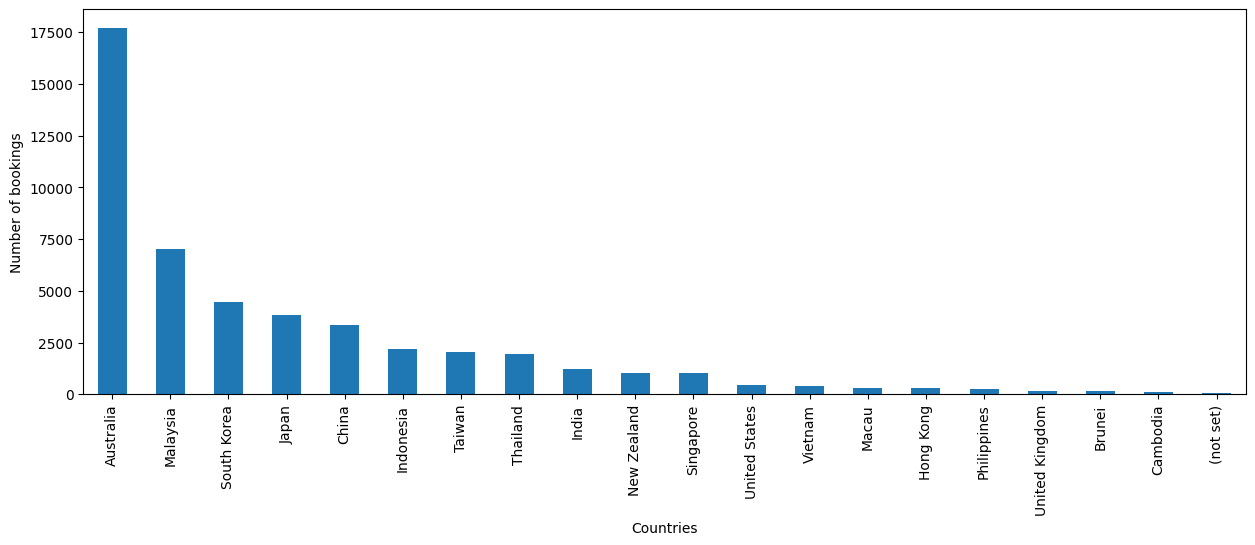

In [ ]:
plt.figure(figsize=(15,5))
ax = df.booking_origin.value_counts()[:20].plot(kind="bar")
ax.set_xlabel("Countries")
ax.set_ylabel("Number of bookings")

**Australia, Malaysia, and South Korea are the 3 countries that make the most bookings**

Text(0, 0.5, 'Number of bookings Complete')

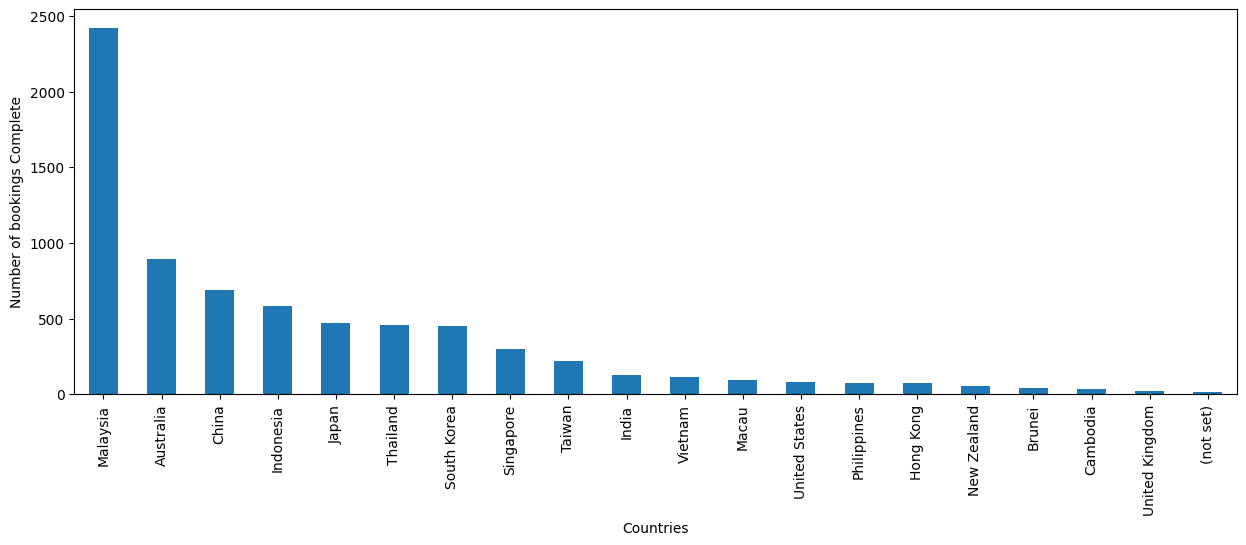

In [ ]:
plt.figure(figsize=(15,5))
ax = df[df.booking_complete ==1].booking_origin.value_counts()[:20].plot(kind="bar")
ax.set_xlabel("Countries")
ax.set_ylabel("Number of bookings Complete")

**Australia, Malaysia, and China are the 3 countries that make the most bookings complete**

Bookings
---



In [ ]:
fail_book = df.booking_complete.value_counts().values[0]
fail_book

41781

In [ ]:
succes_book = df.booking_complete.value_counts().values[1]
succes_book

7360

In [ ]:
#Percentage of Fail Booking

fail_book / len(df) *100

85.02268981095216

In [ ]:
succes_book / len(df) *100

14.977310189047843

**Only 15 % of the total booking is complete**

EXTRACT FILTERED DATAFRAME for Machine Learning
---



In [ ]:
cwd = os.getcwd()

In [ ]:
df.to_csv(cwd + "/filtered_customer_booking_fix.csv", index=False)

In [ ]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0


***From now on, we are using filtered customer bookings for machine learning***

# MACHINE LEARNING

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/filtered_customer_booking_fix.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [ ]:
df1 = df
df1

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49136,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49137,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0
49138,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49139,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0


**We put the categorical data into numerical using one hot encode so we can normalize the value then we can find the correlation**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')

In [ ]:
df_encoder = pd.DataFrame(encoder.fit_transform(df[["sales_channel"]]).toarray())
df_encoder = df_encoder.rename(columns={0:'Internet', 1:'Mobile'})
df1 = df1.join(df_encoder)

df_encoder = pd.DataFrame(encoder.fit_transform(df[["trip_type"]]).toarray())
df_encoder = df_encoder.rename(columns={0:'RoundTRip', 1:'OneWayTrip',2:'CircleTrip'})
df1 = df1.join(df_encoder)

In [ ]:
df1.drop(['Internet', 'Mobile'], axis=1, inplace = True)

In [ ]:
df1.drop(['sales_channel', 'trip_type','booking_origin', 'route'], axis=1, inplace = True)

In [ ]:
df1

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,RoundTRip,OneWayTrip,CircleTrip
0,2,262,19,7,6,1,0,0,5.52,0,0.0,0.0,1.0
1,1,112,20,3,6,0,0,0,5.52,0,0.0,0.0,1.0
2,2,243,22,17,3,1,1,0,5.52,0,0.0,0.0,1.0
3,1,96,31,4,6,0,0,1,5.52,0,0.0,0.0,1.0
4,2,68,22,15,3,1,0,1,5.52,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49136,2,27,6,9,6,1,0,1,5.62,0,0.0,0.0,1.0
49137,1,111,6,4,7,0,0,0,5.62,0,0.0,0.0,1.0
49138,1,24,6,22,6,0,0,1,5.62,0,0.0,0.0,1.0
49139,1,15,6,11,1,1,0,1,5.62,0,0.0,0.0,1.0


In [ ]:
complete = df['booking_complete']

In [ ]:
df1.drop(['booking_complete'], axis=1, inplace = True)
df1

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,RoundTRip,OneWayTrip,CircleTrip
0,2,262,19,7,6,1,0,0,5.52,0.0,0.0,1.0
1,1,112,20,3,6,0,0,0,5.52,0.0,0.0,1.0
2,2,243,22,17,3,1,1,0,5.52,0.0,0.0,1.0
3,1,96,31,4,6,0,0,1,5.52,0.0,0.0,1.0
4,2,68,22,15,3,1,0,1,5.52,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
49136,2,27,6,9,6,1,0,1,5.62,0.0,0.0,1.0
49137,1,111,6,4,7,0,0,0,5.62,0.0,0.0,1.0
49138,1,24,6,22,6,0,0,1,5.62,0.0,0.0,1.0
49139,1,15,6,11,1,1,0,1,5.62,0.0,0.0,1.0


<Axes: >

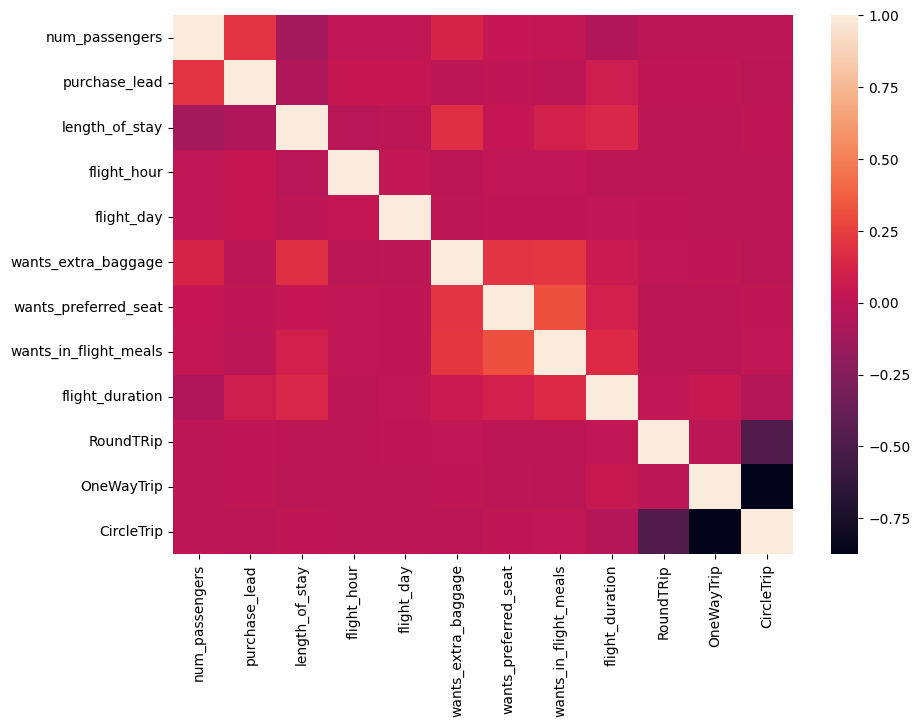

In [ ]:
kor = df1.corr()

plt.figure(figsize=(10,7))

sns.heatmap(kor)

**Normalize the value and make new dataframe**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaler = scaler.fit_transform(df1)

In [ ]:
df_scaler = pd.DataFrame(df_scaler, columns = df1.columns)

In [ ]:
df_scaler['complete']  = complete

In [ ]:
df_scaler

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,RoundTRip,OneWayTrip,CircleTrip,complete
0,0.411953,2.260036,-0.124813,-0.381032,1.103082,0.70005,-0.651505,-0.866982,-1.171737,-0.048643,-0.088746,0.101387,0
1,-0.574442,0.402935,-0.094565,-1.121767,1.103082,-1.42847,-0.651505,-0.866982,-1.171737,-0.048643,-0.088746,0.101387,0
2,0.411953,2.024803,-0.034069,1.470806,-0.408647,0.70005,1.534907,-0.866982,-1.171737,-0.048643,-0.088746,0.101387,0
3,-0.574442,0.204844,0.238165,-0.936584,1.103082,-1.42847,-0.651505,1.153427,-1.171737,-0.048643,-0.088746,0.101387,0
4,0.411953,-0.141815,-0.034069,1.100438,-0.408647,0.70005,-0.651505,1.153427,-1.171737,-0.048643,-0.088746,0.101387,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49136,0.411953,-0.649423,-0.518040,-0.010665,1.103082,0.70005,-0.651505,1.153427,-1.105042,-0.048643,-0.088746,0.101387,0
49137,-0.574442,0.390554,-0.518040,-0.936584,1.606992,-1.42847,-0.651505,-0.866982,-1.105042,-0.048643,-0.088746,0.101387,0
49138,-0.574442,-0.686565,-0.518040,2.396725,1.103082,-1.42847,-0.651505,1.153427,-1.105042,-0.048643,-0.088746,0.101387,0
49139,-0.574442,-0.797991,-0.518040,0.359703,-1.416466,0.70005,-0.651505,1.153427,-1.105042,-0.048643,-0.088746,0.101387,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.inspection import permutation_importance
from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import GridSearchCV,  RepeatedStratifiedKFold
import numpy as np

In [ ]:
X = df_scaler.iloc[:,:-1]
y = df_scaler['complete']

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.20, random_state=42)

In [ ]:
def model_fit_predict(model, X, y, X_predict):
    model.fit(X, y)
    return model.predict(X_predict)

def acc_score(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

def pre_score(y_true, y_pred):
    return precision_score(y_true, y_pred)

def f_score(y_true, y_pred):
    return f1_score(y_true, y_pred)

** TRAINING DATA**

In [ ]:
clf_rf = RandomForestClassifier(max_depth =50 , min_samples_split=5,random_state=0)
y_pred_train = model_fit_predict(clf_rf, X_train, y_train, X_train)

set(y_pred_train)

f1 = np.round(f1_score(y_train, y_pred_train), 2)
acc = np.round(accuracy_score(y_train, y_pred_train), 2)
pre = np.round(precision_score(y_train, y_pred_train), 2)
print(f"Accuracy training data are {acc}")
print(f"Precision training data are  {pre}")
print(f"F1-score for training data are {f1} ")

Accuracy training data are 0.94
Precision training data are  1.0
F1-score for training data are 0.73 


0.935948310948311

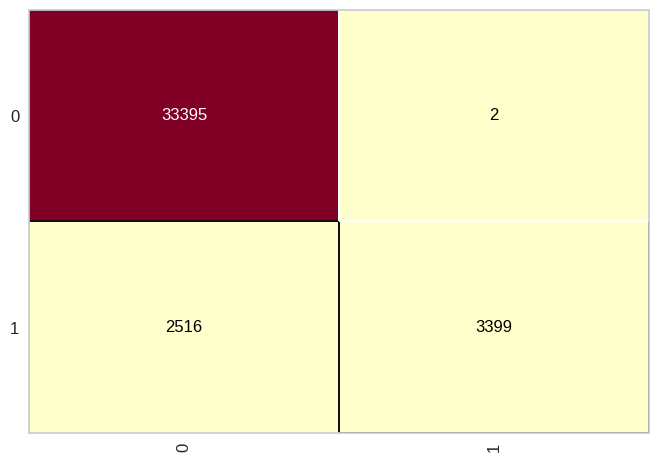

In [ ]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_train, y_train)

**TESTING DATA**

In [ ]:
clf_rf = RandomForestClassifier(max_depth =50 , min_samples_split=5,random_state=0)

y_pred_test = model_fit_predict(clf_rf, X_train, y_train, X_test)


f1 = np.round(f1_score(y_test, y_pred_test),2)

acc = np.round(accuracy_score(y_test, y_pred_test),2)

pre = np.round(precision_score(y_test, y_pred_test),2)

print(f"Accuracy testing data are {acc}")
print(f"Precision testing data are  {pre}")
print(f"F1-score for testing data are {f1} ")

Accuracy testing data are 0.85
Precision testing data are  0.45
F1-score for testing data are 0.07 


0.8516634449079256

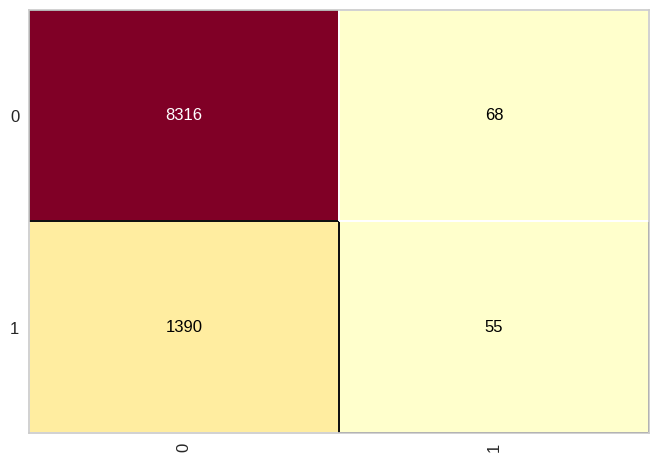

In [ ]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_test, y_test)

Text(0.5, 0, 'Random Forest Feature Importance')

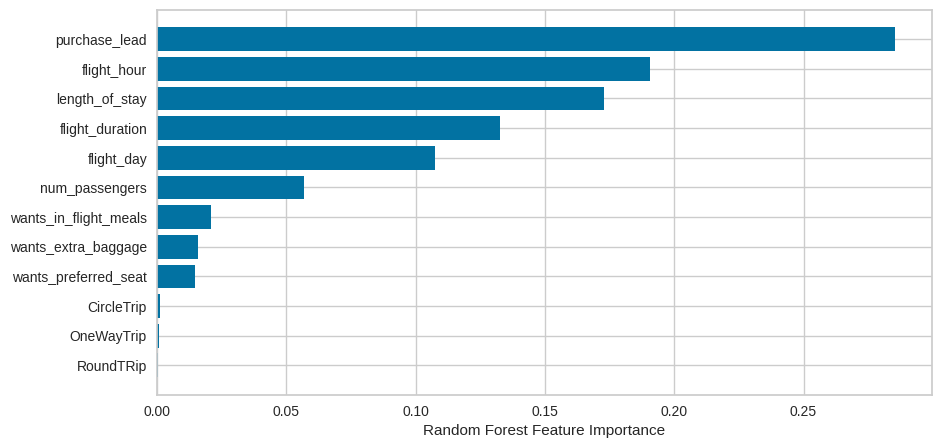

In [ ]:
plt.figure(figsize=(10,5))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.barh(df_scaler.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [ ]:
df_scaler.complete.value_counts()

0    41781
1     7360
Name: complete, dtype: int64

In [ ]:
notcomplete = df_scaler[df_scaler.complete ==0].sample(n=7500)

In [ ]:
dfbalance = pd.concat([df_scaler[df_scaler.complete==1], notcomplete], ignore_index=True)

In [ ]:
dfbalance

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,RoundTRip,OneWayTrip,CircleTrip,complete
0,-0.574442,-0.797991,0.238165,1.470806,-1.416466,-1.42847,-0.651505,-0.866982,1.035871,-0.048643,-0.088746,0.101387,1
1,-0.574442,0.947685,-0.124813,0.915254,-1.416466,0.70005,-0.651505,-0.866982,1.035871,-0.048643,-0.088746,0.101387,1
2,-0.574442,1.257202,1.932062,-1.306951,-0.912556,0.70005,-0.651505,1.153427,1.035871,-0.048643,-0.088746,0.101387,1
3,-0.574442,0.588645,-0.185310,1.285622,-0.912556,0.70005,-0.651505,1.153427,1.035871,-0.048643,-0.088746,0.101387,1
4,-0.574442,-0.463712,-0.185310,0.915254,-0.912556,-1.42847,-0.651505,-0.866982,1.035871,-0.048643,-0.088746,0.101387,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14855,-0.574442,-0.773229,-0.548288,0.544887,-1.416466,-1.42847,1.534907,-0.866982,1.035871,-0.048643,-0.088746,0.101387,0
14856,0.411953,1.405770,-0.003821,-0.936584,-0.408647,0.70005,1.534907,1.153427,1.035871,-0.048643,-0.088746,0.101387,0
14857,-0.574442,-0.748468,-0.185310,-0.195848,1.606992,0.70005,1.534907,1.153427,0.869133,-0.048643,-0.088746,0.101387,0
14858,0.411953,-0.104673,-0.518040,-0.195848,1.606992,-1.42847,-0.651505,-0.866982,-1.171737,-0.048643,-0.088746,0.101387,0


In [ ]:
X = dfbalance.iloc[:,:-1]
y = dfbalance['complete']

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.20, random_state=42)

In [ ]:
def model_fit_predict(model, X, y, X_predict):
    model.fit(X, y)
    return model.predict(X_predict)

def acc_score(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

def pre_score(y_true, y_pred):
    return precision_score(y_true, y_pred)

def f_score(y_true, y_pred):
    return f1_score(y_true, y_pred)

In [ ]:
clf_rf = RandomForestClassifier(max_depth =50 , min_samples_split=5,random_state=0)

y_pred_test = model_fit_predict(clf_rf, X_train, y_train, X_test)


f1 = np.round(f1_score(y_test, y_pred_test),2)

acc = np.round(accuracy_score(y_test, y_pred_test),2)

pre = np.round(precision_score(y_test, y_pred_test),2)

print(f"Accuracy testing data are {acc}")
print(f"Precision testing data are  {pre}")
print(f"F1-score for testing data are {f1} ")

Accuracy testing data are 0.62
Precision testing data are  0.62
F1-score for testing data are 0.62 


0.6214670255720054

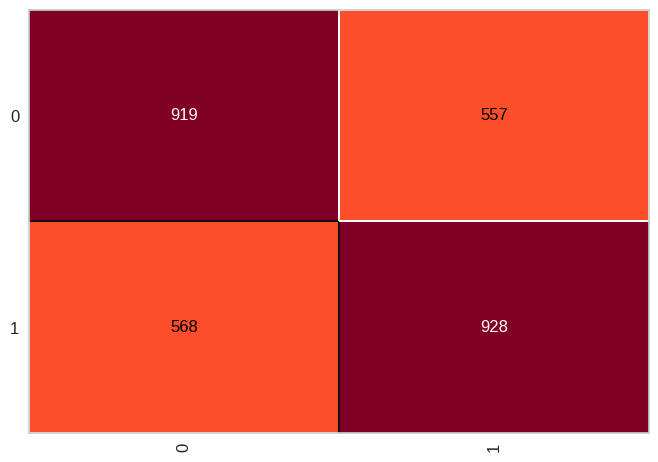

In [ ]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_test, y_test)

Text(0.5, 0, 'Random Forest Feature Importance')

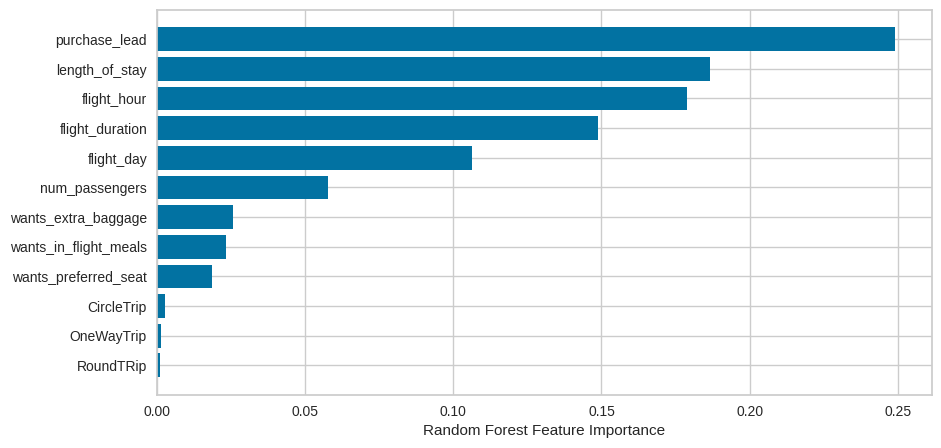

In [ ]:
plt.figure(figsize=(10,5))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.barh(df_scaler.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")